Lauri Pelin <br>
Lajpel@utu.fi <br>
 </font>

------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about data so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM) which is <font color = darkorchid><i>modeling</i></font>.

The questions to be answered at this stage could be for example:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve that performance?
- How the performance of the model is evaluated?

<i>Machine learning</i> is a subfield of artificial intelligence which provides automatic, objective and data-driven techniques for modeling the data. The machine learning algorithms aim to learn from data to make predictions. The two main branches of it are <i>supervised learning</i> and <i>unsupervised learning</i>.  In this exercise, we are going to use the former -- <font color = darkorchid><i>supervised learning</i></font> -- for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format, so that models can learn something from it. Even though we are not doing any major data exploration nor data preparation here this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from the course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

<font color = red size = 4><b>The deadline is 28 November at 18:00</b></font>. Late submissions will not be accepted unless there is a valid excuse for extending the deadline before the due date.

------

### Gather **all** packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using <font color = darkorchid><b>K-Nearest Neightbors (k-NN) algorithm</b></font>. The k-NN algorithm is one of the classic supervised machine learning algorithms. It assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to **predict the presence of cardiovascular disease** using all the other variables as <font color = darkorchid><b>features</b></font> in the given data set. So, the target variable is <font color = darkorchid><b>cardio</b></font>.

But first, we need data for the task. The code for loading the data into the environment is provided for you. <font color = red>The code should work, but make sure, that you have the csv file of the data in the same directory where you have this notebook file.</font> 

***Exercise 1 A)*** 

Print the first 10 rows to check that everything is ok with the created dataframe.

*note: as said, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable gluc (about glucose levels), which is one-hot-encoded for you. It has the similar values as cholesterol originally does [normal, at risk, elevated]. Also, binary variables have been changed to [0,1] values.*


In [2]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Create a dataframe
cardio_data = pd.read_csv(data_path, dtype='int')

In [3]:
### Code - 10 first row
cardio_data.head(10)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
0,22767,0,162,75,120,80,0,0,1,0,0,0,1,0,0,1
1,19102,0,164,80,140,90,0,0,1,0,0,0,1,0,0,1
2,23251,0,155,76,130,80,0,0,1,0,0,0,1,0,1,0
3,22651,1,169,65,120,80,0,0,1,0,0,0,1,0,0,1
4,21770,1,171,67,160,100,0,0,0,1,0,0,1,0,0,1
5,14651,1,170,70,120,80,0,0,1,0,0,0,1,0,0,1
6,17391,0,152,65,110,70,0,0,1,0,0,0,1,0,0,1
7,14792,0,165,65,120,70,0,0,1,0,0,0,1,0,0,1
8,15982,1,180,81,110,70,1,0,1,0,0,0,1,0,0,1
9,19589,0,156,60,120,90,0,0,1,0,0,0,1,0,0,1


----

We have the data so let's make use of it. 

To teach the k-NN algorithm (or any kind of machine learning algorithm) to recognize patterns, we are going to need <font color = darkorchid><b>training data</b></font>. But to test how well a model possibly learned those patterns, we'll need <font color = darkorchid><b>test data</b></font> which is new and unseen for the trained model. Keep in mind that the test set is not shown for the model before we are actually done with training. 

So, to **find the estimate for the performance of a model**, we are going to use this <font color = darkorchid><b>train-test split</b></font>. "Split" because we literally split the data into two sets.

Sometimes <font color = darkorchid>stratification</font> needs to be considered. It can be used to ensure that train and test sets contain the same proportions of samples of each target class as the original data set.

***Exercise 1 B)*** 

Gather the features as an array `features`, and the target variable as an array `labels`. Produce training and test data.  Divide the data **randomly** into training (80%) and test (20%) sets.

- Would it be a good idea to use stratification? **Explain** your decision.

In [4]:
### Code - Train-test split

### All the features seem sufficient and have no reason to be removed for this exercise.
### Categorical: sex	smoke	alco	active	cholesterol_at_risk	cholesterol_elevated		cholesterol_elevated	cholesterol_normal	gluc_at_risk	gluc_elevated	gluc_normal
### Numerical: age	height	weight	ap_hi	ap_lo
### Thanks to one-hot-encoding we can use the categorical values with numerical values
labels = cardio_data['cardio'] #target variable array
#print(labels) #what do our labels look like?
y=labels
features= cardio_data.loc[:, cardio_data.columns != 'cardio' ] 
#features = features.values #array containing features
#print(features) #features seem ok?
X=features 


#stratifying the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, stratify=labels)
#print("X_train", X_train) #quick glance at X_train data
#print("y_train", y_train) #quick glance at y_train data

### <font color = red> Stratification for labels seems like a good idea because it could help us to distinguish subgroups by eliminating sampling bias in the test set. In this case I believe the target variable can be divided into mutually exclusive groups so I support stratification.


----------

***Exercise 1 C)*** 

Scale the numeric features. 

- Remind yourself briefly why you need this step. 
- What can you say about scaling especially from the perspective of the k-NN algorithm?

*tip: You should now have **two** variables where you have the features divided into. Don't forget to scale the test data. Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html.*

In [5]:
### Code - Standardization
#X_train = StandardScaler().fit_transform(X_train)
#print(X_train) #quick glance at X_train data after stand
#ScalerY = StandardScaler().fit(x_train.reshape((1, -1)))
#X_test = StandardScaler().transform(X_test)
#X_test = StandardScaler().fit_transform(X_test) #Don't fit X_test data!!

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
print(X_test) #quick glance at X_test data after stand

[[ 1.42603367  1.34792485  0.98455701 ... -0.27697656 -0.25819889
   0.39293912]
 [ 0.0235898   1.34792485  1.36697112 ... -0.27697656 -0.25819889
   0.39293912]
 [ 1.72574792 -0.74188112 -0.29015671 ... -0.27697656 -0.25819889
   0.39293912]
 ...
 [-1.21551567 -0.74188112  0.47467152 ... -0.27697656 -0.25819889
   0.39293912]
 [ 0.17129773 -0.74188112  3.40651307 ... -0.27697656 -0.25819889
   0.39293912]
 [-0.660634   -0.74188112  0.09225741 ... -0.27697656 -0.25819889
   0.39293912]]


### <font color = red>  Answer here - why standardization?
    
### <font color = red> Standardization is essential for distance based algorithms. kNN uses distance as an estimator and standardizing the data prevents the kNN from getting biased results from great variance between the different variables.***

-------

It's time for us to train the model!

***Exercise 1 D)*** 

Train a k-NN model with $k=3$. Print out the confusion matrix.
- What can you say about the confusion matrix?
- How does the model perform with the different classes? Where do you think the differences come from?
- What is the total classification accuracy? How would you interpret it?
- Perform also the following:
    - Make 1000 **different** train and test set splits.
    - Run the k-NN model (with $k=3$) for each split and save its accuracy.  
    - Plot accuracies in a histogram.
    - Discuss your results


*tip: `sklearn.metrics.classification_report` is a great way to build up a text report showing the main classification metrics*

 3 nn score: 0.735 


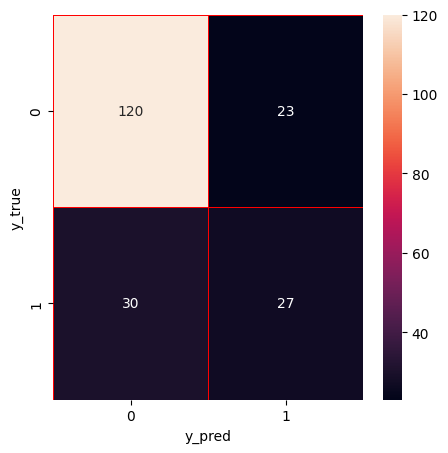

0.735

In [6]:
### Code - kNN classifier
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
print(" {} nn score: {} ".format(3,knn.score(X_test,y_test)))

y_pred =knn.predict(X_test)

cm=confusion_matrix(y_test, y_pred)

f, ax=plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
knn.score(X_test,y_test)
#X_test #does X_test still work as it should?

#### What can you say about the confusion matrix?

#### Confusion matrix shows that our model correctly predicted cases to be positive 127 times, falsely predicted cases to be true 37 times, positive cases that were falsely predicted as negative 16 times and true negative cases were correctly identified 20 times. These numbers may vary a bit if the kernel has been restarted.



#### According to knn.score our accuracy is roughly 0.765. This could be skewed due to the high number of true positives in the data?



In [7]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred,output_dict=True)

{'0': {'precision': 0.8,
  'recall': 0.8391608391608392,
  'f1-score': 0.8191126279863481,
  'support': 143},
 '1': {'precision': 0.54,
  'recall': 0.47368421052631576,
  'f1-score': 0.5046728971962616,
  'support': 57},
 'accuracy': 0.735,
 'macro avg': {'precision': 0.67,
  'recall': 0.6564225248435774,
  'f1-score': 0.6618927625913049,
  'support': 200},
 'weighted avg': {'precision': 0.7259,
  'recall': 0.735,
  'f1-score': 0.7294973047111735,
  'support': 200}}

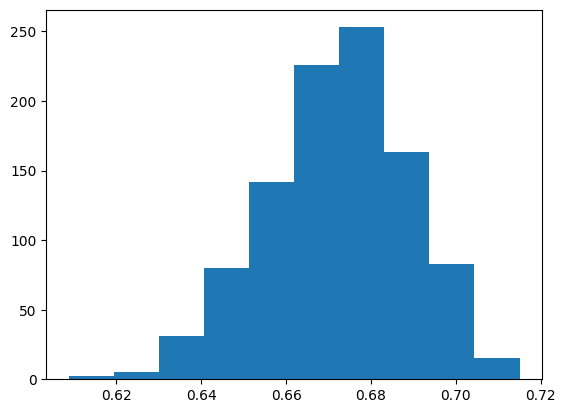

0.67196625


In [8]:
### Code - 1000 different train-test-splits
# sklearn.preprocessing.KBinsDiscretizer


#test_size=0,8
thousand = np.zeros(1000)
for j in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,stratify=y)
    knn2=KNeighborsClassifier(n_neighbors=3)
    knn2.fit(X_train, y_train)
    thousand[j]=knn2.score(X_test, y_test)
plt.hist(thousand)
plt.show()
print(np.mean(thousand))

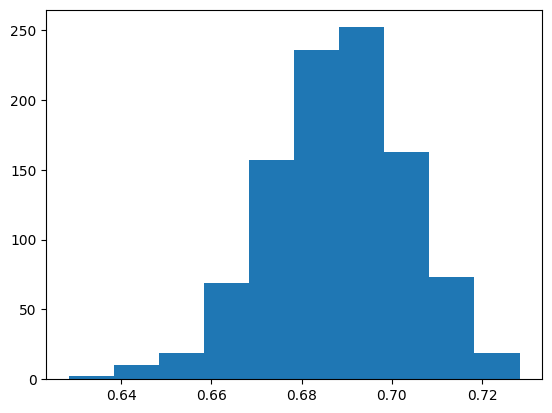

0.6871716666666667


In [9]:
#test_size=0,6
thousand = np.zeros(1000)
for j in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6,stratify=y)
    knn2=KNeighborsClassifier(n_neighbors=3)
    knn2.fit(X_train, y_train)
    thousand[j]=knn2.score(X_test, y_test)
plt.hist(thousand)
plt.show()
print(np.mean(thousand))

### <font color = red> \*** The accuracy seems to hover near 67-69% depending on the specified size of the allowed data.*** 

------

One really common evaluation metric is <font color = darkorchid><b>the area under the receiver operating characteristic (AUROC or AUC-ROC)</b></font>.

***Exercise 1 E)*** 

Explain what information you can learn about the one k-NN model you trained by using AUROC. Also, evaluate the performance by computing  the metric and plotting the related curve. Draw also the line for random guesses.

- How would you interpret the results?

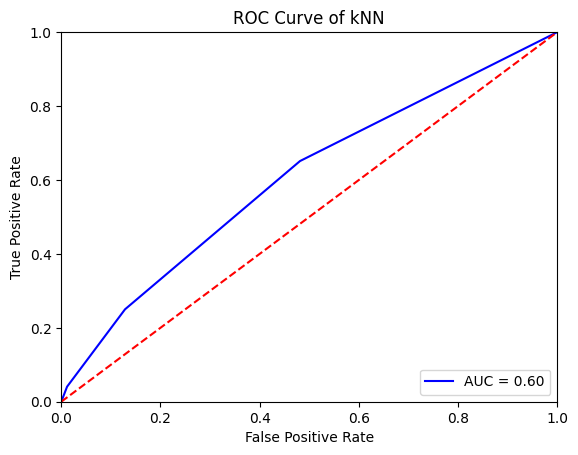

In [10]:
### Code - AUROC and ROC Curves
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
knn2.fit(X_train, y_train)
y_scores = knn2.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

### <font color = red> According to Receiver Operating Characteristic Curve in Diagnostic Test Assessment by Jayawant N.Mandrekar an AUC score of less than 0.7 is poor, 0.7-0.8 is acceptable and 0.8-0.9 is excellent. https://doi.org/10.1097/JTO.0b013e3181ec173d </font>

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross validation

Even thought the train-test split gives us an unbiased estimate of the performance, we only evaluate the model one time. Especially with very small data sets, a test set will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = darkorchid><b>cross-validation</b></font>. This time, we'll take a look at <font color = darkorchid><i>leave-one-out cross-validation</i></font>.

***Exercise 2 A)***

Describe *in your own words*, how leave-one-out cross validation works? How does it actually differ from the basic train-test split?

### <font color = red> Leave-one-out cross validation runs once for every single test set and tests each set by using the rest of the runs as training. Therefore it is a cross-validating method and self-explanatory as it leaves one test set out for cross-validation. It differs from basic train-test-split by virtue of being very unbiased.

---------------

***Exercise 2 B)***

Let's predict once again the **presence of cardiovascular disease** using all the other variables in the dataset as features. Now, use leave-one-out cross validation to estimate the model performance. Again, use a kNN classifier with $k=3$.

- What is the classification accuracy? Compare the result with the one you got in the previous task.

*tip: Sure this could be done manually, but `cross_val_score` is quite a handy function too.*

In [11]:
### Code - Leave-one-out cross validation

#Manually?
loocv=LeaveOneOut()
accuracy=np.zeros(loocv.get_n_splits(X)) #accuracy[test_index] Wouldn't work without np.zeros

knn3 = KNeighborsClassifier(n_neighbors=3)
for train_index, test_index in loocv.split(X):
    X_train, X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    y_train, y_test=y.iloc[train_index],y.iloc[test_index]
    knn3.fit(X_train,y_train)
    accuracy[test_index]=knn3.score(X_test,y_test)

#Cross_val_score
print(np.mean(accuracy))
cvs=cross_val_score(estimator=knn3, X= X_train,y=y_train,cv=10) 
cvs
print("%0.2f accuracy with a standard deviation of %0.2f" % (cvs.mean(), cvs.std()))

0.707
0.71 accuracy with a standard deviation of 0.04


### <font color = red> Classification accuracy is roughly < 0.04 better. Manually we got an accuracy of 0.707 and Cross_val_score gave us a 0.71 accuracy with a standard deviation of 0.04. Our previous accuracies were in the 67-69% range.

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's try that by <font color = darkorchid><b>hyperparameter tuning</b></font>.

This time, we're going to train multiple models, let's say 30, and choose the best K-Nearest Neighbors model among the others. Almost all models have some parameters that need to be chosen. As does the k-NN, I just happened to choose the k value of 3 for you. Note, k-NN has many other hyperparameters too, but for the sake of simplicity, this time we'll focus only on the nearest neighbors. 

Now, you're supposed to find that *optimal value* for k.

***Exercise 3***

Repeat the model performance estimation with values $k=1...30$ using again leave-one-out cross validation.

- Which value of k produces the best classification accuracy?
- If the number of k is still increased, what is the limit that the classification accuracy approaches? Why? 
- Can you say something about the performance of this selected model with new, unseen data? Explain, how you could you estimate the performance of this selected model.

*tip: `GridSearchCV` is a good class for this but will you get the other but the best k value out of it?*

### I'm going to test the difference between the manual LeaveOneOut implementation and cross_val_score.
#### First I will execute the manual implementation, then I will check the result with GridSearchCV and finally I'll use cross_val_score. 
#### I will include the charts side by side at  the end.

In [12]:
### Code - Select best k
loocv=LeaveOneOut()
accuracy=np.zeros(loocv.get_n_splits(X))
k=np.zeros(30)
for j in range(30):
    knn4 = KNeighborsClassifier(n_neighbors=j+1)
    for train_index, test_index in loocv.split(X):
        X_train, X_test=X.iloc[train_index,:],X.iloc[test_index,:]
        y_train, y_test=y.iloc[train_index],y.iloc[test_index]
        knn4.fit(X_train,(y_train)) #np.ravel fix?
        accuracy[test_index]=knn4.score(X_test,np.ravel(y_test))
        k[j]=np.mean(accuracy)
#sns.lineplot(np.array(range(30))+1,k)

Text(0.5, 1.0, 'Manual loocv accuracy with k neighbors')

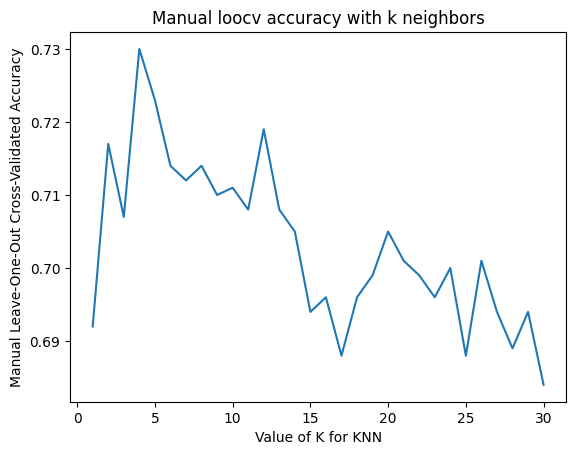

In [13]:
plt.plot(np.array(range(30))+1,k)
plt.xlabel('Value of K for KNN')
plt.ylabel('Manual Leave-One-Out Cross-Validated Accuracy')
plt.title("Manual loocv accuracy with k neighbors")

### Looks like 4 is the best k-value for manual leave-one-out.
### Let's test this with grid_search

In [14]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 4}


[0.689, 0.714, 0.708, 0.728, 0.721, 0.7120000000000001, 0.712, 0.713, 0.7129999999999999, 0.712, 0.7129999999999999, 0.716, 0.711, 0.707, 0.7040000000000001, 0.6980000000000001, 0.6980000000000001, 0.703, 0.703, 0.702, 0.6970000000000001, 0.692, 0.695, 0.6950000000000001, 0.7, 0.6950000000000001, 0.702, 0.6990000000000001, 0.701, 0.6939999999999998]


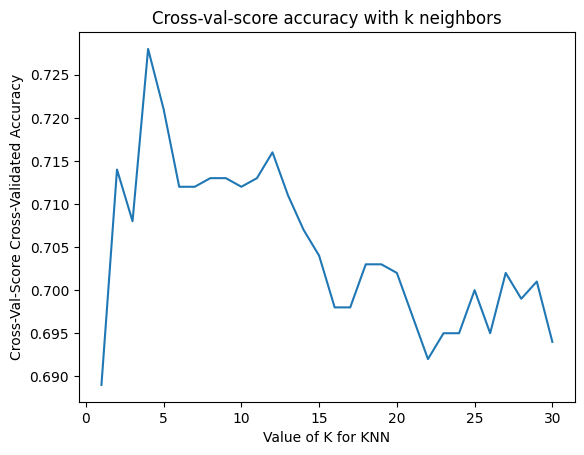

In [15]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Val-Score Cross-Validated Accuracy')
plt.title("Cross-val-score accuracy with k neighbors")
plt.show()

<font color = red> \*** Answer here ***
   
### <font color = red> k=4 produces the best classification accuracy with ~ 73% 
### <font color = red> I think the limit would be called underfitting because the model would not be that great at predicting new data and it would learn to always predict the majority cases in the data. Let us simulate this by increasing the number of neighbors to 200:

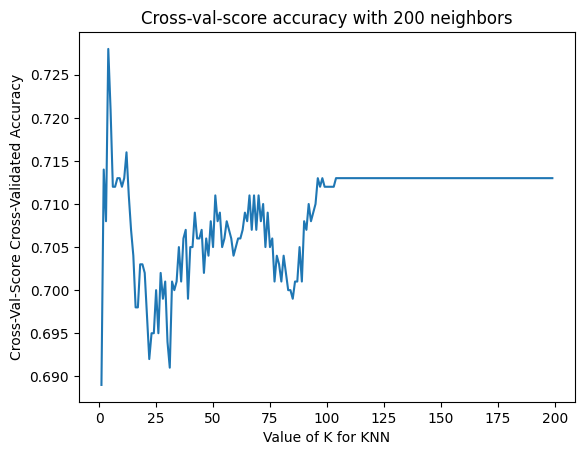

In [16]:
k_range = list(range(1, 200))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
#print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Val-Score Cross-Validated Accuracy')
plt.title("Cross-val-score accuracy with 200 neighbors")
plt.show()

### <font color = red> After k hits over 100 the accuracy stops at roughly 71.25%. If I had to throw a guess I'd say that the classifier just predicts the most common variable over and over at that point.
    
### <font color = red> As for the performance of this selected model with new, unseen data. The greatest accuracy was achieved with k=4 with an accuracy of ~73%. If the new data did not vary a lot from our previous data I would estimate this model to keep performing the same way it already has. And if the new data varied a lot and had some kind of outliers the model would of course need to be updated by preprocessing the data and retraining the model. The resulting differences in performance however would naturally be almost impossible to predict without seeing the new data and how it varies from our original data.  

________________
## <font color = red>  4. Testing with training data <font color = red> (this should *never* be done out of this exercise!) </font>

Oh, but what if we just used the ***whole data*** in training? Wouldn't we like to use as much data as possible to discover the underlying pattern in the data so why **not** to use the whole data?

*Never ever* do this out of this exercise. Why? Let's take a look.

***Exercise 4***

Repeat the previous task but use the whole data for training. Plot the resulting classification accuracy versus $k = 1...30$. Include the values from the previous task in the *same figure*.

- Comment your result and answer, why you should not test with training data?

In [17]:
### Code - Train with whole data
loocv=LeaveOneOut() #duh
accuracy=np.zeros(loocv.get_n_splits(X)) 
#print(accuracy.shape) # Does it match with what we want?
#print(X)
k=np.zeros(30) #𝑘=1...30 
for j in range(30):
    knn5 = KNeighborsClassifier(n_neighbors=j+1)
    for train_index, test_index in loocv.split(X):
        X_train, X_test=X.iloc[train_index,:],X.iloc[test_index,:]
        y_train, y_test=y.iloc[train_index],y.iloc[test_index]
        knn5.fit(X,np.ravel(y)) #ALL data
        accuracy[test_index]=knn5.score(X_test,np.ravel(y_test))
        k[j]=np.mean(accuracy)

### "Include the values from the previous task in the same figure"? Do you mean the one with range of 200?

Text(0, 0.5, 'Accuracy of K using all data')

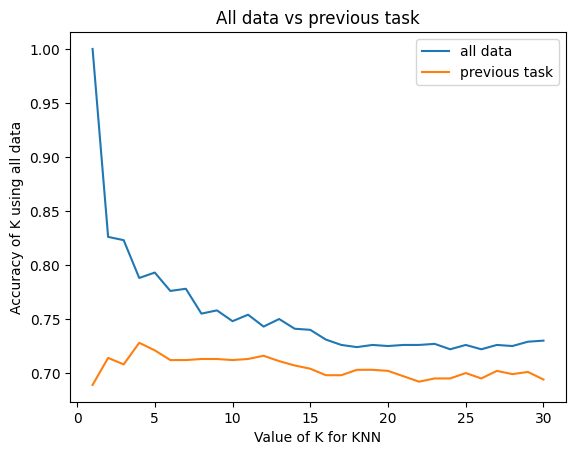

In [18]:
### Code - Plot results
del k_scores[30:200]
plt.plot(np.array(range(30))+1,k, label="all data")
plt.plot(np.array(range(30))+1, k_scores,label="previous task")
plt.legend(loc="upper right")
plt.title("All data vs previous task")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy of K using all data')

 <font color = red> \*** Answer here ***
    
### <font color = red> So the accuracy of K using all data is higher for every value of K than our values from the previous task. But I think there is a good reason for that. I believe this is due to the fact that we don't have any new data to test this against. So in essence the "all data" model is very good in predicting the old data but perhaps not that great when introduced to data it hasn't seen yet.

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and kNN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression. We're going to use <font color = darkorchid><b>Ridge Regression</b></font> and <font color = darkorchid><b>K-Nearest Neighbors Regression</b></font>, and compare the performances of these models.

To make this exercise more intuitively, let's change the data to another somewhat famous dataset called *The Boston Housing Dataset*. The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. Let's have a quick peek at the variables:

- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per \$10,000
- **PTRATIO** - pupil-teacher ratio by town
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in \$1000's


No worries if the variables don't make a lot of sense. However, the object is to predict **the median house value**. So the target variable is now <font color = darkorchid><b>MEDV</b></font> and all the others are <font color = darkorchid><b>features</b></font>.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [19]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_boston_housing_data.csv'

# Load the data 
boston_data = pd.read_csv(data_path, dtype='float')

-----------

With regression, we can examine **the relationship between two or more variables**. This relationship is represented by an *equation*, which itself represents how much y changes with any given change of x. So for example, we could use *age* as an independent variable to predict *height* (a dependent variable). 

We start by looking at the relationships between the variables in the given dataset.


***Exercise 5 A)***

Make scatter plots where you present each feature versus the target variable `MEDV`.

- What can you say about the relationships?

*tip: seaborn.pairplot is quite a handy function where you can set x_vars and y_vars to point out the variables you need*

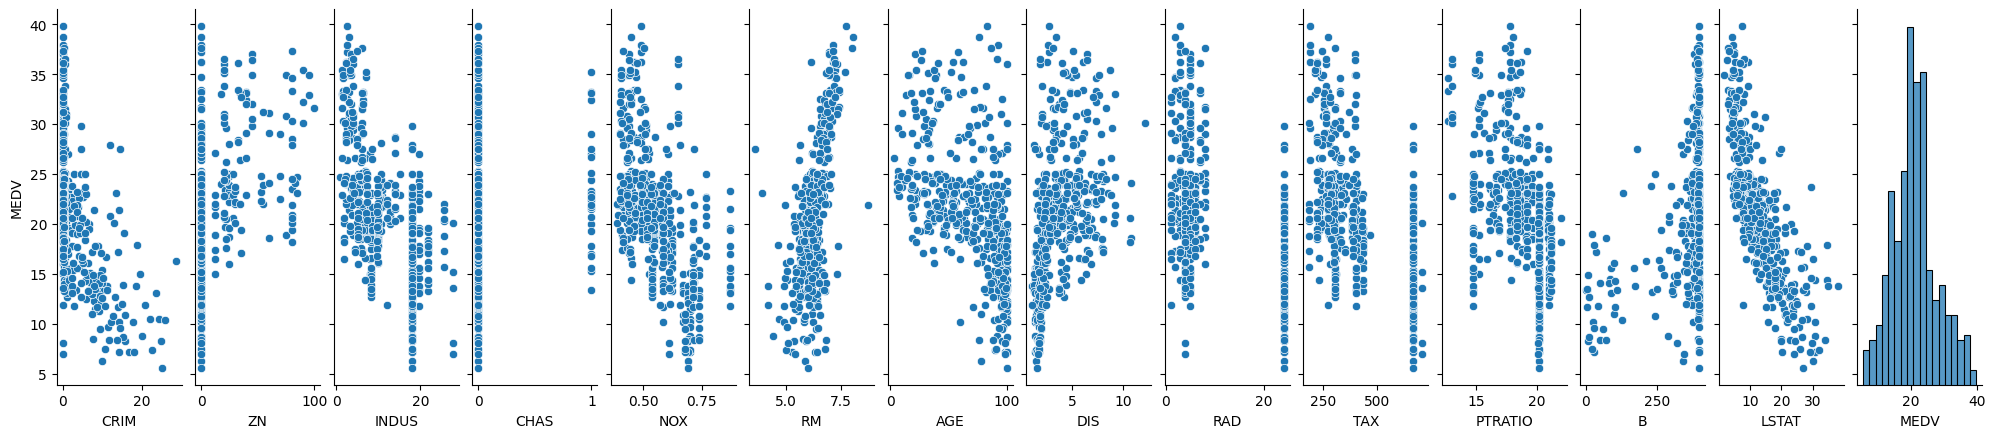

In [20]:
### Code - Scatter plots

fig1=sns.pairplot(boston_data, y_vars=['MEDV'])
fig1.fig.set_size_inches(20,5)

### Pairplot has no ax parameter? Makes it a bit difficult to plot on plt.subplots...
### Plots are almost unreadable, let us try a workaround

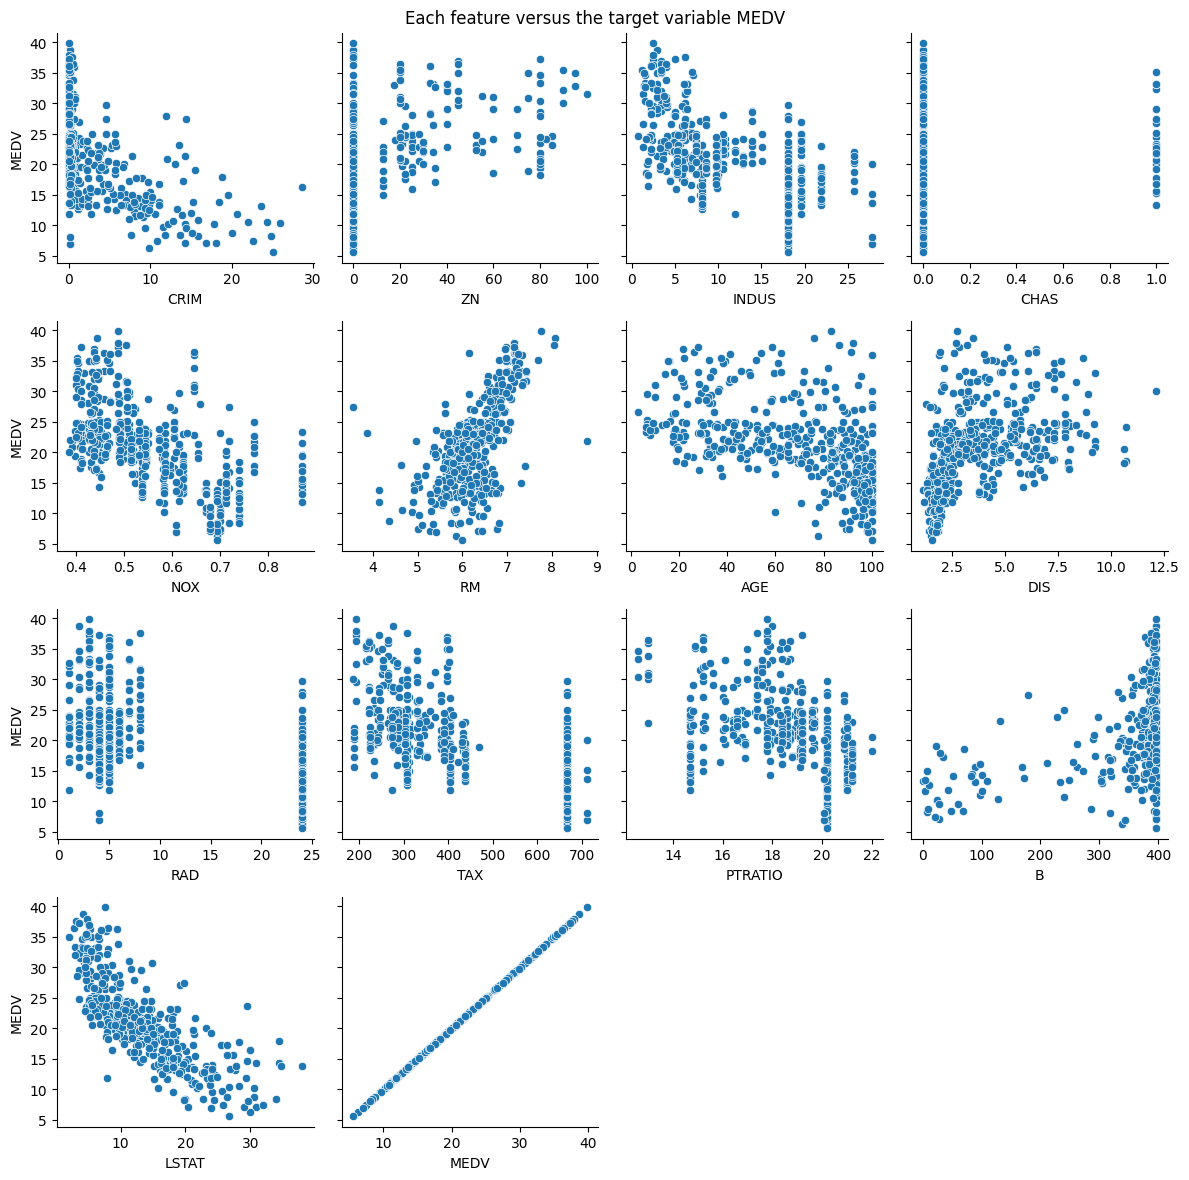

In [21]:
#a possible workaround found on https://github.com/mwaskom/seaborn/issues/2121
x_vars = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False,margin_titles=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=boston_data, x=x_var, y="MEDV", ax=ax)
g.set_titles("") 
g.set_axis_labels(y_var="MEDV")
g.fig.subplots_adjust(top=20.9)
g.fig.suptitle('Each feature versus the target variable MEDV')
g.tight_layout()

### <font color = red> I can't see any VERY clear outliers. RM and LSTAT seem to maybe have some kind of correlation with MEDV. CHAS and RAD seem categorical in nature.
    
### <font color = red> The B column is infamous and I doubt I have the competency to examine it further or even understand the complexities attached to it. I'm pretty sure that either this dataset was chosen on purpose or the B column was kept in this dataset on purpose to allow us to examine and think about the ethics of data science.  </font> 

------

We are about to compare two different regression models. We need to be sure that both are *the best models* among the other trained models. But to make sure that these selected models really are the best ones, we're going to use a combination of cross-validation and hyperparameter tuning right away. What's the other way to ensure that the chosen hyperparameters are appropriate for the given data?

For the k-Nearest neighbors, we have previously get familiar with the optimization of the k value. Let's continue with this value to find the *optimal k* for the k-nearest neighbors regression too. With ridge regression, we have this hyperparameter called $\lambda$ (read as 'lambda'). We'll use this parameter for model selection.


To compare the models, let's use a loss function called <font color = darkorchid><b>mean absolute error (MAE)</b></font>. 



***Exercise 5 B)***

Do you need to prepare the data a little? Explain your decision.

<font color = red>\*** Answer here *** </font> 
### <font color = red> As before, the data needs to be split into train and test sets and it needs to be standardized.
### <font color = red>The categorical values need to be one-hot-encoded. From what I've gathered so far the one-hot-encoding needs to happen after the split to prevent data leakage but the trade-off is that it is quite a bit more time consuming for a miniscule benefit. Is this correct? For this exercise however I'll one-hot-encode before the split.
### <font color = red>I don't think the B column makes much sense for estimating Median value of owner-occupied homes so I'm going to drop it out.

In [49]:
### Code - Preparation

boston_data2=boston_data
boston_data2=boston_data.loc[:, boston_data.columns != 'B' ] #removing the B column
data4 = pd.DataFrame(data=boston_data2)
data4 = pd.get_dummies(data4, columns=['CHAS']) #CHAS for one-hot-encoding
data4 = pd.get_dummies(data4, columns=['RAD']) #RAD for one-hot-encoding

labels2 = data4['MEDV'] #target variable array
#print(data4.isnull().any()) #are there are null values??
y2=labels2
features2= data4.loc[:, data4.columns != 'MEDV' ] #features
X2=features2


#No need for stratification as the labels are presumably not mutually exclusive
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
#print(labels2)
#print(features2)
#print("X_train", X_train)
#print("y_train", y_train)
#print("X_test", X_test)

In [50]:
### Code - Standardization
#X_train = StandardScaler().fit_transform(X_train)
#print(X_train) #testing if train data makes sense
#ScalerY = StandardScaler().fit(x_train.reshape((1, -1)))
#X_test = StandardScaler().transform(X_test) #Don't fit X_test data!!



sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
#print(X_test) #testing if test data makes sense

------

***Exercise 5 C)***

Then, train a ridge regression model  and a k-NN regression model. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation.

- What are the total performances of each model and how they compare with each other? 
- What does the MAE tell you about the performances of your models and in general?

*note: In a `sklearn.linear_model.Ridge` class, lambda is called alpha so don't get confused*

### I'm not sure if I've correctly implemented these. 
#### First I'll do the RidgeCV (which by default performs efficient Leave-One-Out Cross-Validation) and then I'll do the k-NN


In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import RidgeCV
#Parameter tuning for 𝜆=2^-10...2^10 
alphas=[2**(-10),2**-9,2**-8,2**-7,2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**0,2**1,2**2,2**3,2**4,2**5,2**6,2**7,2**8,2**9,2**10]
RidgeCV=RidgeCV(alphas)
print(alphas)
RidgeCV.fit(X_train, y_train)
y_pred_ridgecv=RidgeCV.predict(X_test)
print("RidgeCV MAE (mean absolute error)", mean_absolute_error(y_test, y_pred_ridgecv))
print(RidgeCV.alpha_)

[0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
RidgeCV MAE (mean absolute error) 2.3757217436044598
8.0


### 

### Best alpha achieved with lambda=2**3 

### kNN regression turned out to be a bit harder to implement.. 

Text(0.5, 1.0, 'Impact of n on Test MAE, traning MAE and LOOCV MAE')

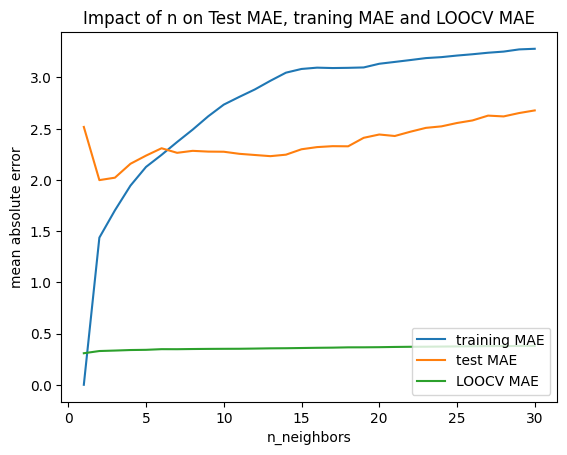

In [25]:
training_mae = []
test_mae = []
cvs_rs=[]
loocv=LeaveOneOut()
# try 𝑘=1...30 
neighbors_settings = range(1, 31)
for n_neighbors in neighbors_settings:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    help1=knn.fit(X_train, y_train)
    help2=cross_val_score(help1, X, y, cv = loocv,scoring='neg_mean_absolute_error')
    cvs_rs.append(help2.mean())
    y_pred = knn.predict(X_train)
    # record training set error
    training_mae.append(mean_absolute_error(y_train, y_pred))
    # record test set error
    y_pred1 = knn.predict(X_test)
    test_mae.append(mean_absolute_error(y_test, y_pred1))
cvs_rs2=np.abs(cvs_rs) #changing negative values to positive for figure clarity
plt.plot(neighbors_settings, training_mae, label='training MAE')
plt.plot(neighbors_settings, test_mae, label='test MAE')
plt.plot(neighbors_settings, cvs_rs2, label='LOOCV MAE')
#print(cvs_rs)
#print(cvs_rs2)
plt.ylabel('mean absolute error')
plt.xlabel('n_neighbors')
plt.legend(loc="lower right")
plt.title("Impact of n on Test MAE, traning MAE and LOOCV MAE")

### If I've understood MAE scores correctly lower score equals better performance. This figure shows that LOOCV MAE is considerably better than others but I'm a bit skeptical due to it's high performance compared to RidgeCV MAE..

### The lowest test MAE by this figure is achievable with n<6


### Let us test this by changing the cross_val_score scoring to accuracy and see the resulting figure

In [26]:
k_range = range(1, 31) # try 𝑘=1...30 
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=loocv, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.692, 0.717, 0.707, 0.73, 0.723, 0.714, 0.712, 0.714, 0.71, 0.711, 0.708, 0.719, 0.708, 0.705, 0.694, 0.696, 0.688, 0.696, 0.699, 0.705, 0.701, 0.699, 0.696, 0.7, 0.688, 0.701, 0.694, 0.689, 0.694, 0.684]


Text(0.5, 1.0, 'Loocv accuracy by value of n')

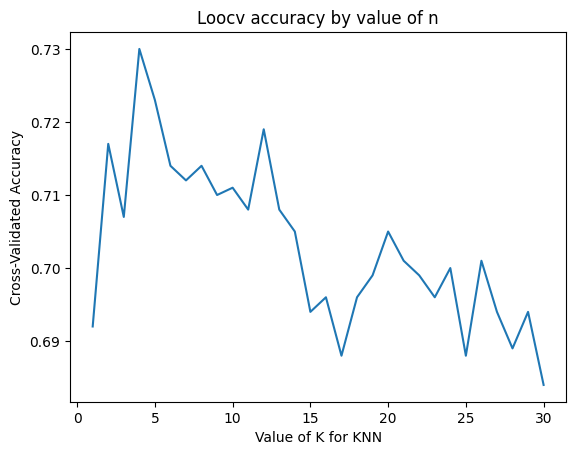

In [27]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title("Loocv accuracy by value of n")

### This figure confirms our suspicions that the best results would be achievable with n<6. In fact the best value of k seems to be 4.

In [28]:
knn = KNeighborsRegressor(n_neighbors=4) #roughly best parameter
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred1 = knn.predict(X_test)
k1 = mean_absolute_error(y_train, y_pred)
k2 = mean_absolute_error(y_test, y_pred1)
print('MAE of KNN Regressor on training set: {:.3f}'.format(k1))
print('MAE of KNN Regressor on test set: {:.3f}'.format(k2))

MAE of KNN Regressor on training set: 1.944
MAE of KNN Regressor on test set: 2.157


<font color = red>\*** Answer here - discuss your results (comparison and MAE) ***</font>
### <font color = red> RidgeCV's best MAE (mean absolute error) ~2.375 was achieved with 𝜆=8 whereas KNeighborsRegressor had MAE of 1.944 on training set and MAE of 2.157  on test set with n=4. LOOCV MAE scores ranged between 0.308 and 0.378 which could mean there may have been some kind of error in my methods of procuring it.

------

We can say something about the performance now. One way to do the visualization is to plot actual labels vs predicted labels. Let's do that.


***Exercise 5 D)***

Using the best models found in the previous exercise, plot the actual labels vs. predicted labels. 

- How did the selected models perform?
- In an ideal situation, where should the data points be located?

Text(0.5, 0.98, 'Predicted and actual label values of kNN regression (n=4) for Boston housing data')

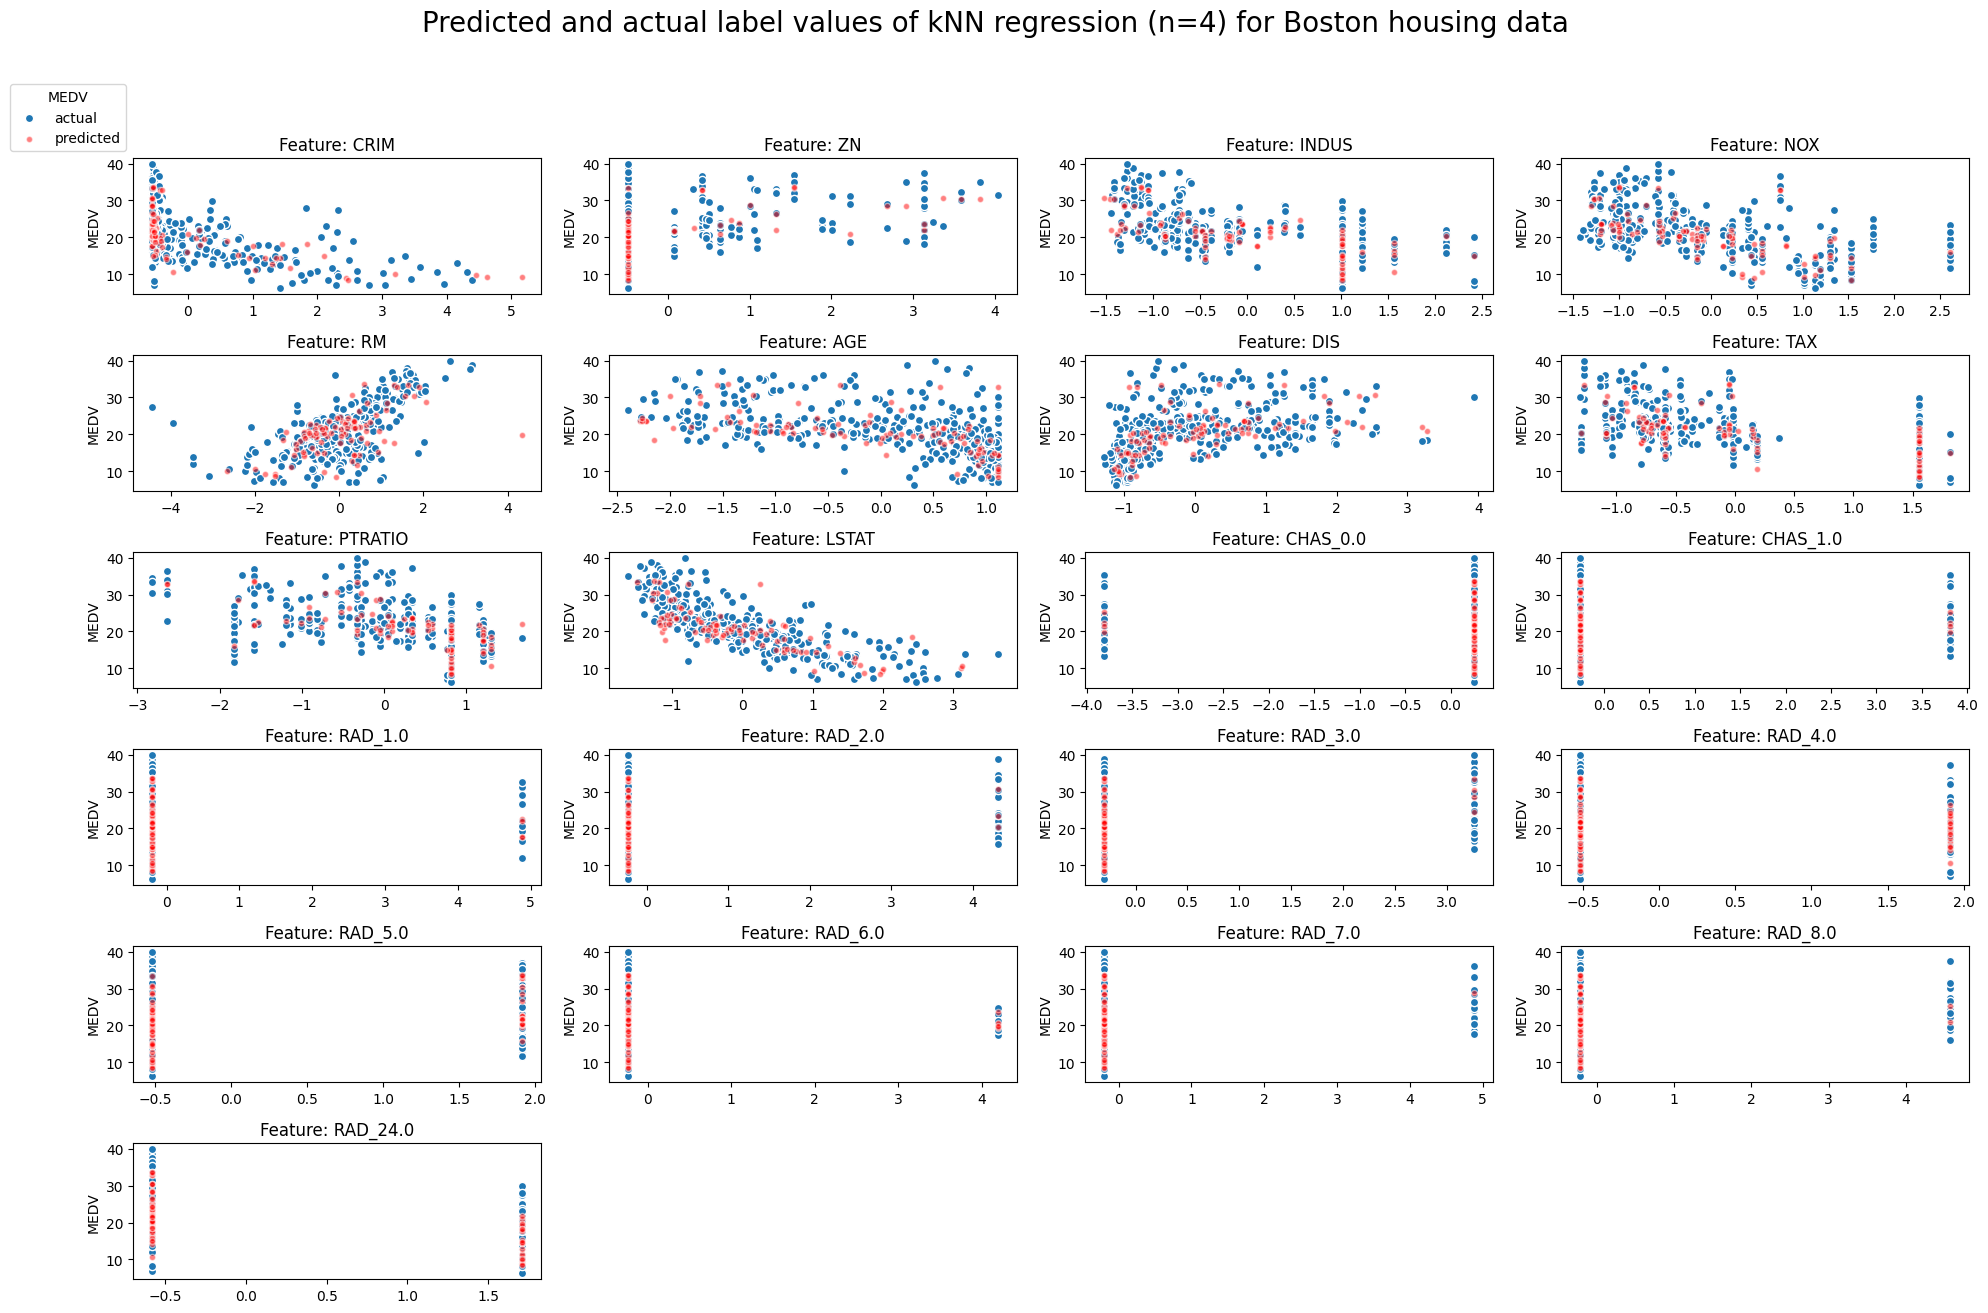

In [51]:
### Code - Plot actual vs predicted labels

#kNN regressor
loocv=LeaveOneOut()
knn = KNeighborsRegressor(n_neighbors=4) #n=4 as tested before
knn.fit(X_train, y_train)
y_predict1=knn.predict(X_test)
y_predict_train = knn.predict(X_train)
# create the figure
fig, axes = plt.subplots(ncols=4, nrows=9, figsize=(20, 20)) #roughly the optimal layout of plots in my opinion
X_train2 = pd.DataFrame(X_train, columns = X2.columns)

X_test2 = pd.DataFrame(X_test, columns=X2.columns)
axes = axes.flatten()
#print(X2.columns) #do the columns make sense?
#print(y_predict1) does predict look ok

# iterate through the column values, and use i to index the axes
for i, v in enumerate(X2.columns):
    
    # seclect the column to be plotted
    data = X_train2[v]
    data2 = X_test2[v]
    
    # plot the actual label's value MEDV 
    axes[i].scatter(x=data, y=y_train, s=35, ec='white', label='actual')
    
    # plot predicted label's value MEDV 
    axes[i].scatter(x=data2, y=y_predict1, c='red', s=20, ec='white', alpha=0.5, label='predicted')

    # set the title and ylabel
    axes[i].set(title=f'Feature: {v}', ylabel='MEDV')

# set a single legend
axes[0].legend(title='MEDV', bbox_to_anchor=(0, 1), loc='lower right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# delete the last unused axes
for v in range(21, 36):
    fig.delaxes(axes[v])
    
g.fig.subplots_adjust(top=20.9)
fig.suptitle('Predicted and actual label values of kNN regression (n=4) for Boston housing data',fontsize=20)
#print(y_test)

### <font color = red>In an ideal world the predicted dots (red) would be as close as possible to the training data dots (blueish).  I can't distinguish any very clear outliers and the predicted values seem to be rather close to the training data values.  </font> 
    
### <font color = red> Naturally making an observation and judging data by a glance isn't a very scientific evaluation method but the model seems to fare decently.</font> 
    
### <font color = red> Let us test out of pure curiosity the prediction errors of this model.



Text(0, 0.5, 'Frequency')

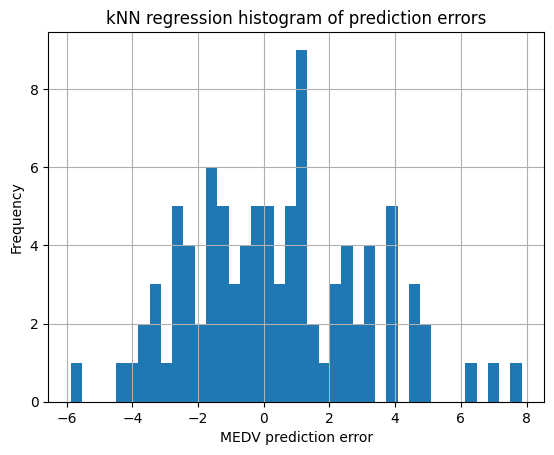

In [30]:
diff1 = y_test - y_predict1
diff1.hist(bins = 40)
plt.title('kNN regression histogram of prediction errors')
plt.xlabel('MEDV prediction error')
plt.ylabel('Frequency')

### Up next is the Ridge regression model.

[8]


Text(0.5, 0.98, 'Predicted and actual label values of Ridge regression (lambda=8) for Boston housing data')

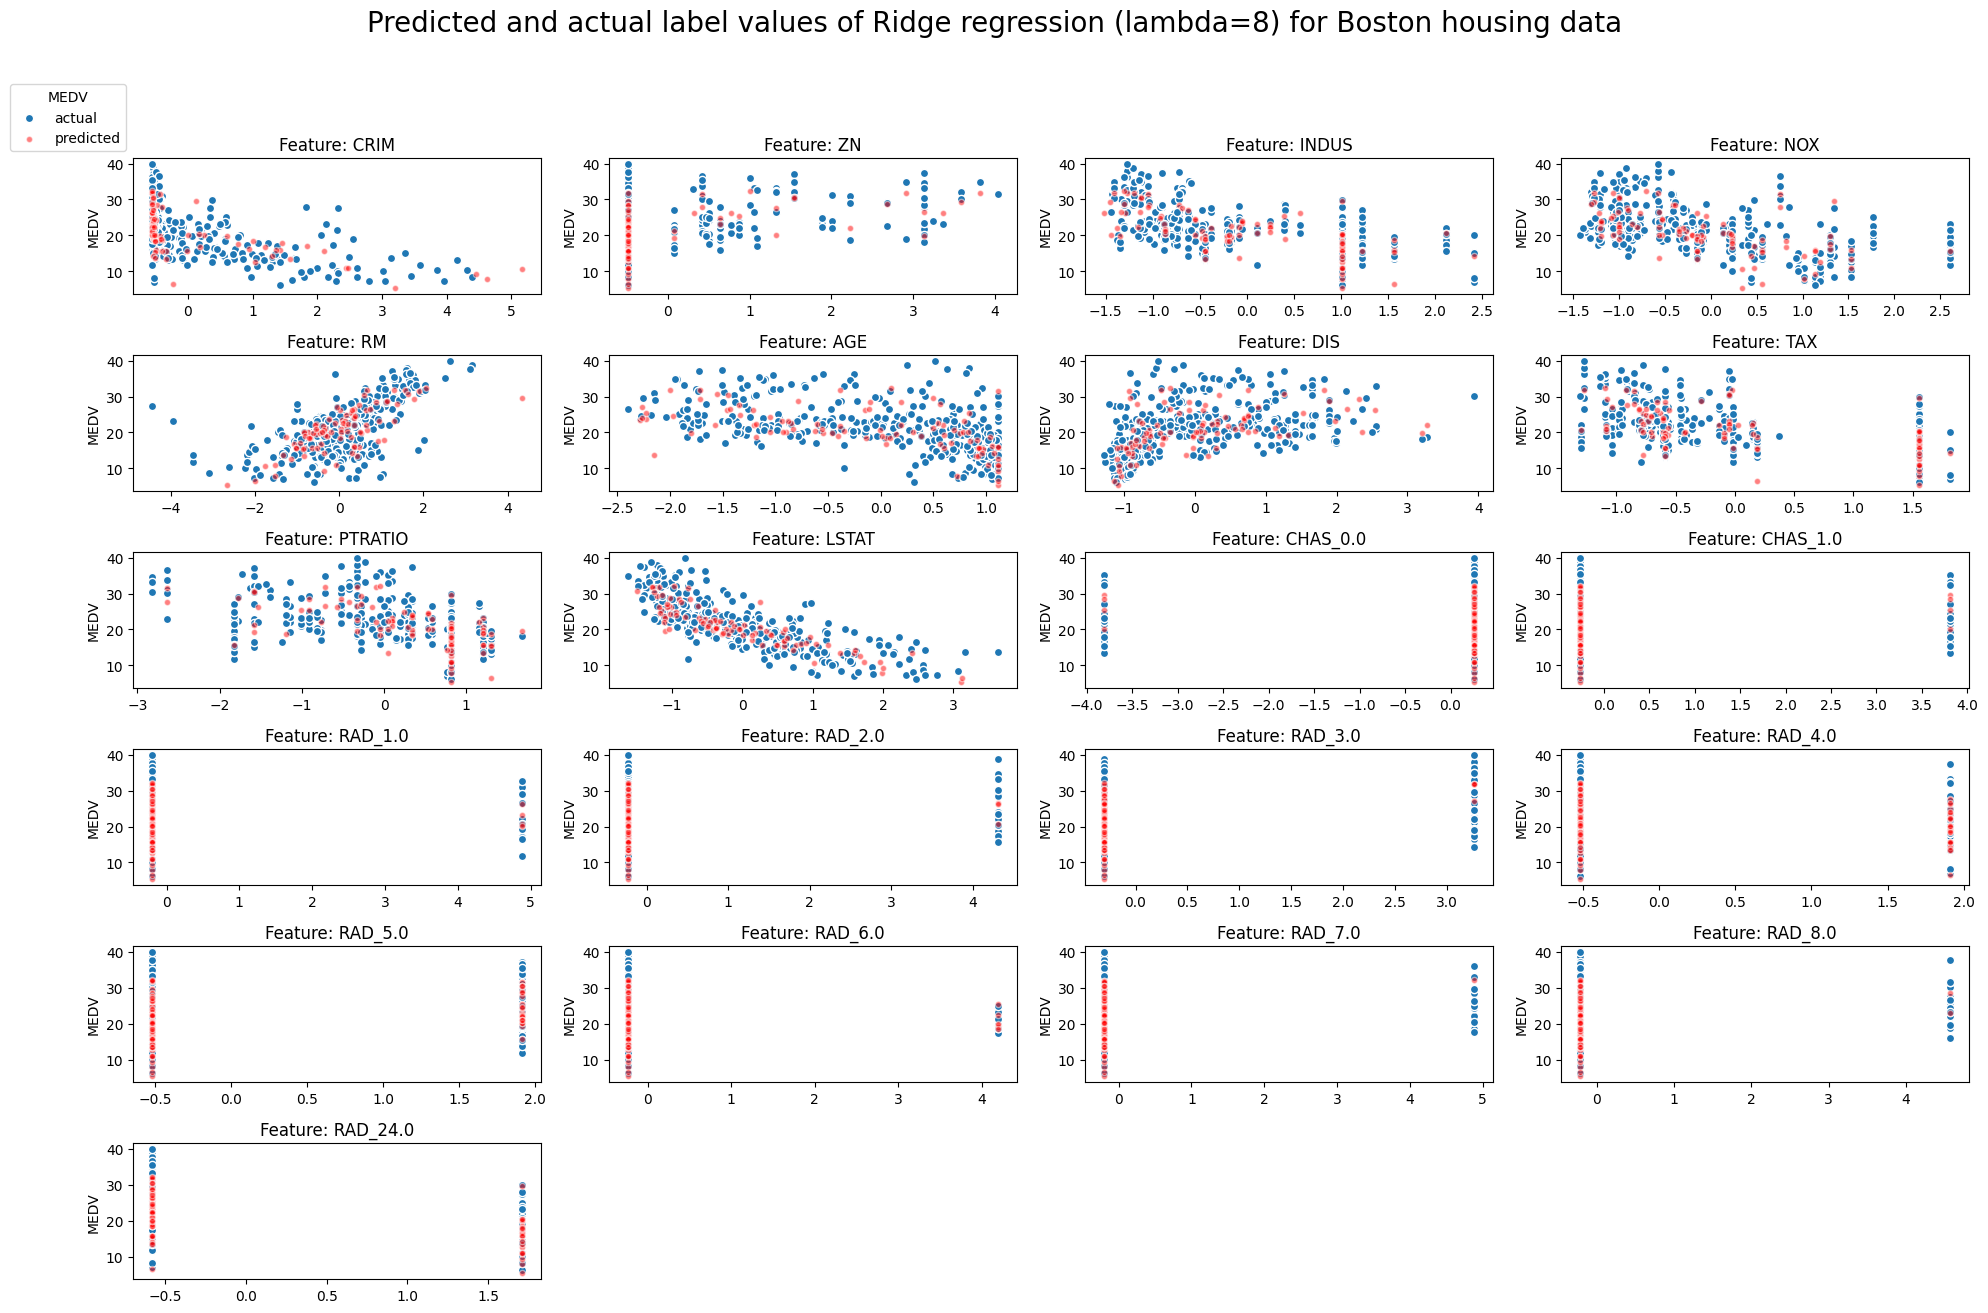

In [52]:
### Code - Plot actual vs predicted labels

#Ridge regressor
alphas=[2**3]
print(alphas)
RidgeCV.fit(X_train, y_train)
y_predict2=RidgeCV.predict(X_test)
y_predict_train = RidgeCV.predict(X_train)
# create the figure
fig, axes = plt.subplots(ncols=4, nrows=9, figsize=(20, 20))
X_train3 = pd.DataFrame(X_train, columns = X2.columns)

X_test3 = pd.DataFrame(X_test, columns=X2.columns)

axes = axes.flatten()
#print(X2.columns) #are the columns ok
#print(y_predict2) #what does the predict look like
# iterate through the column values, and use i to index the axes
for i, v in enumerate(X2.columns):
    
    # seclect the column to be plotted
    data = X_train3[v]
    data2 = X_test3[v]
    
    # plot the actual label's value MEDV 
    axes[i].scatter(x=data, y=y_train, s=35, ec='white', label='actual')
    
    # plot predicted label's value MEDV 
    axes[i].scatter(x=data2, y=y_predict2, c='red', s=20, ec='white', alpha=0.5, label='predicted')

    # set the title and ylabel
    axes[i].set(title=f'Feature: {v}', ylabel='MEDV')

# set a single legend
axes[0].legend(title='MEDV', bbox_to_anchor=(0, 1), loc='lower right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# delete the last unused axes
for v in range(21, 36):
    fig.delaxes(axes[v])
    

fig.suptitle('Predicted and actual label values of Ridge regression (lambda=8) for Boston housing data',fontsize=20)
#print(y_test) checking

### <font color = red> In an ideal world the predicted dots (red) would again be as close as possible to the training data dots (blue). As before with kNN regressor I can't distinguish any very clear outliers and the predicted values seem to be rather close to the training data values. </font> 
    
### <font color = red> My eyes or brain could be deceiving me but the predicted label values *seem* to score a bit lower MEDV values for both models across the board than the actual label values.  </font> 
    
### <font color = red> Let us once again test out of pure curiosity the prediction errors of this model.</font>


0.04437672777871362


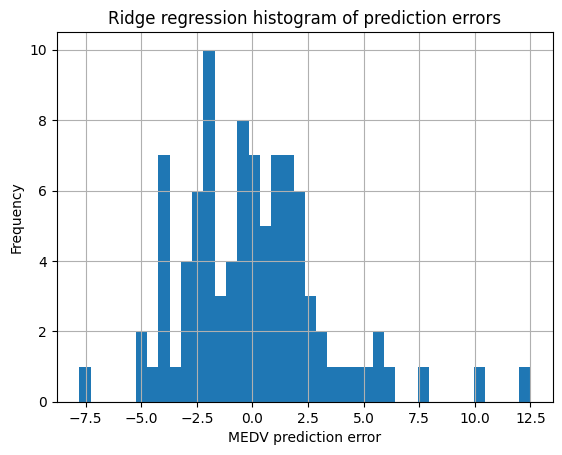

In [32]:
diff2 = y_test - y_predict2
diff2.hist(bins = 40)
plt.title('Ridge regression histogram of prediction errors')
plt.xlabel('MEDV prediction error')
plt.ylabel('Frequency')
print(diff2.mean())

### <font color = red> Hard to tell the difference between the models by a quick glance so let's fix that as well.</font>


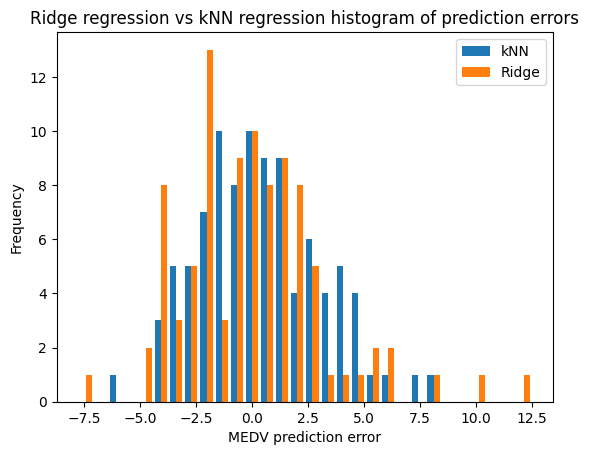

kNN 0.40265957446808487 94
Ridge 0.04437672777871362 94


In [33]:
bins = 30
plt.hist([diff1, diff2], bins, label=['kNN', 'Ridge'])
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.title('Ridge regression vs kNN regression histogram of prediction errors')
plt.xlabel('MEDV prediction error')
plt.ylabel('Frequency')
plt.show()
print("kNN",diff1.mean(),diff1.count())
print("Ridge",diff2.mean(),diff2.count())

### <font color = red> Well that is interesting. I'm running out of time to analyze this much further but I think this shows at the very least some differences between the regression models' prediction errors.</font>

### <font color = red> I will as a final step plot both models' results vs the y-test data.

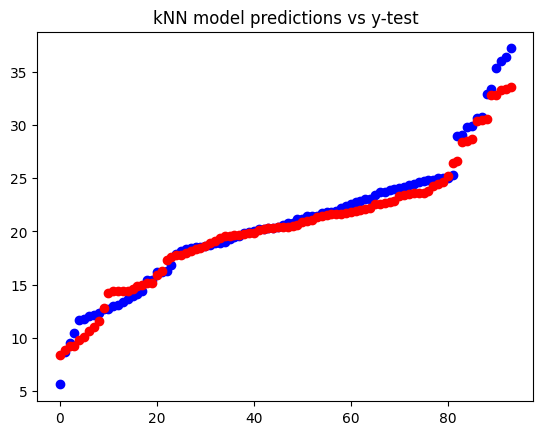

In [62]:
def plotGraph(y_test,y_predict1,madeupName):
    if max(y_test) >= max(y_predict1):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_predict1))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_predict1)), y_predict1, color='red')
    plt.title(madeupName)
    plt.show()
    return



plotGraph(sorted(y_test), sorted(y_predict1), "kNN model predictions vs y-test")

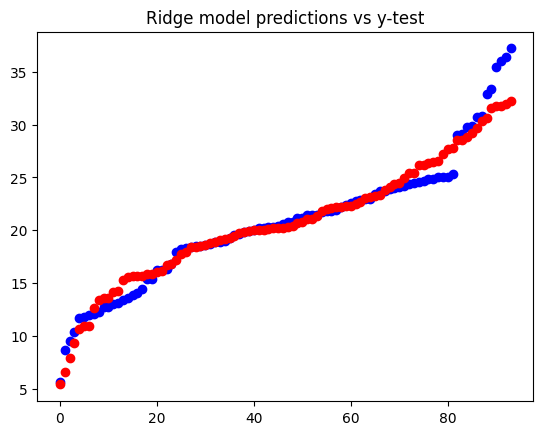

In [63]:
def plotGraph(y_test,y_predict2,madeupName):
    if max(y_test) >= max(y_predict2):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_predict2))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_predict2)), y_predict2, color='red')
    plt.title(madeupName)
    plt.show()
    return


plotGraph(sorted(y_test), sorted(y_predict2), "Ridge model predictions vs y-test")

________________
## <font color = dimgrey> BONUS: Feature selection - most useful features in predicting the disease </font>

You can stop here and get the "pass" grade! To get the "pass with honors" grade, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise is not as straightforward as the previous ones, and may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain me what you did and why you did it.

----------------


Unfortunately, due to the lack of resources and time, doctors are not able to measure all the values represented in the given dataset. Luckily, keen students are ready to help: You should now find <font color = darkorchid><b>five [5] most useful features</b></font> in predicting the presence of the cardiovascular disease among the ones in the given cardio data set. 

Use the selected features to train and test a model of your choice. Evaluate the performance by computing the accuracy and drawing a ROC curve. Remember not to use any information from the test set when selecting the features!

**Discuss** your results.

In [34]:
### Code - BONUS!

<font color = red> \*** Answer here *** </font>